In [365]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [366]:
sales = pd.read_csv('combined.csv')

In [367]:
sales = sales[sales['month'] >= '2016-01']

In [368]:
sales.head()

,month,sales
24,2016-01,32759506.12
25,2016-02,39785722.81
26,2016-03,50276824.29
27,2016-04,26237321.88
28,2016-05,30250499.14


In [369]:
sales.tail()

,month,sales
65,2019-06,27803166.03
66,2019-07,31583768.66
67,2019-08,30069055.14
68,2019-09,32447605.40
69,2019-10,29274550.82


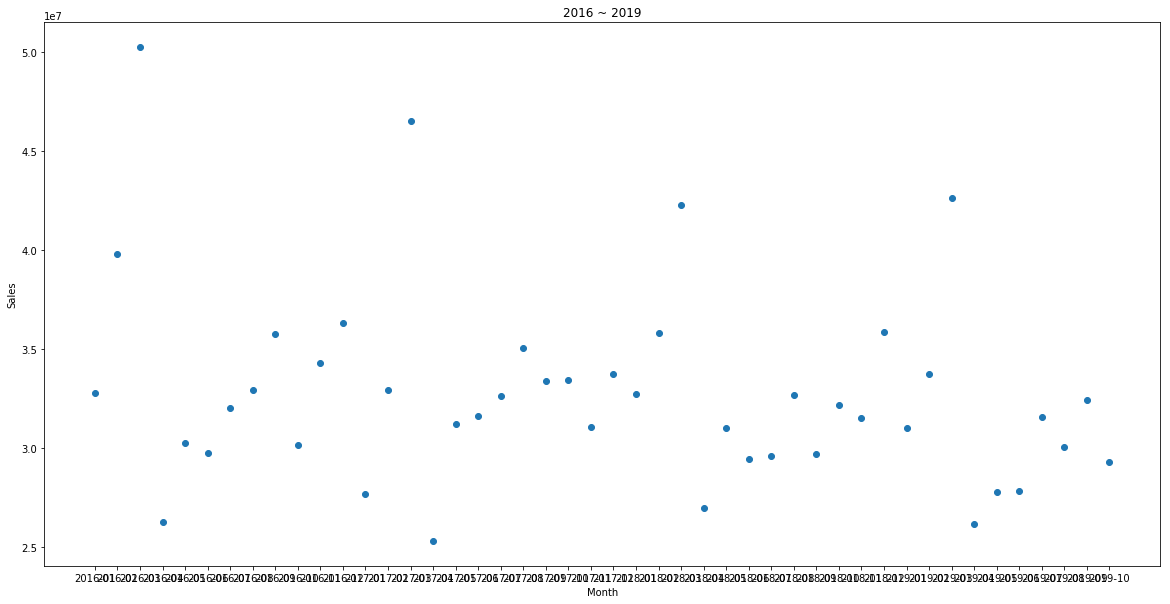

In [370]:
plt.figure(figsize=(20, 10))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title("2016 ~ 2019")
plt.scatter(sales['month'], sales['sales'])
plt.show()

In [371]:
def make_params(year_months):
    params = [ym.split('-') for ym in year_months]
    years = [int(ym[0]) for ym in params ]
    months = [int(ym[1]) for ym in params ]
    return years, months

In [372]:
years, months = make_params(sales['month'])
sales['y'] = years
sales['m'] = months

In [488]:
X = sales.filter(['y', 'm'], axis=1).values
y = sales.filter(['sales'], axis=1).values

In [489]:
X = np.log(X)
y = np.log(y)

In [490]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0)

In [491]:
X_test

array([], shape=(0, 2), dtype=float64)

In [ ]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
#clf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#clf = SVR(kernel='rbf', C=100, gamma=1e-8, degree=3, epsilon=.1,coef0=1)
#clf.fit(test, svm_y_train) 

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3, 1e4],
                               "gamma": np.logspace(-10, 10, 1000)})
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
#svm_X_train = np.log(svm_X_train)
sc_x = StandardScaler(with_mean=False )
sc_y = StandardScaler(with_mean=False )
scaled_x= sc_x.fit_transform(X_train)
scaled_y = sc_y.fit_transform(y)

t0 = time.time()
svr.fit(scaled_x, scaled_y.flatten())
kr.fit(scaled_x, scaled_y.flatten())
svr_fit = time.time() - t0
print("Train time: {}".format( svr_fit))

In [ ]:
def scale(X, y):
    return sc_x.fit_transform(X), sc_y.fit_transform(y)

In [ ]:
def svm_predict(X):
    X = sc_x.fit_transform(X)
    #print(X)
    return svr.predict(X)

In [ ]:
def kr_predict(X):
    X = sc_x.fit_transform(X)
    #print(X)
    return kr.predict(X)

In [ ]:
def plot_x(X):
    return  [str(x[0]) + '-' + str(x[1]) for x in X]

In [ ]:
import datetime
import calendar
def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

In [ ]:
today = date.today()
months = []
months_params = []

In [ ]:
for i in range(12):
    year = add_months(today, i).strftime('%Y')
    month = str(int(add_months(today, i).strftime('%m')))
    months.append(year+'-'+month), months_params.append([int(year), int(month)])

In [ ]:
months

In [ ]:
months_params

In [ ]:
svm_predit(months_params)

In [ ]:
plt.figure(figsize=(50, 10))
plt.title("Regression Comparasion")
plt.plot(plot_x(X),sc_y.fit_transform(y).flatten() ,label='Overall data(SVM)')
plt.scatter(plot_x(X_train), svm_predict(X_train), label='Test Data')
plt.legend()

In [ ]:
plt.figure(figsize=(50, 10))
plt.title("Regression Comparasion")
plt.plot(plot_x(X),sc_y.fit_transform(y).flatten() ,label='Overall data(SVM)')
plt.scatter(plot_x(X_train), kr_predict(X_train), label='Test Data')
plt.legend()

In [ ]:
type(sc_y.fit_transform(y).flatten())

In [ ]:
type(svm_predit(months_params))

In [ ]:
months_params

In [ ]:
plt.scatter(months, svm_predict(months_params))